In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python import layers
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('../0_resources/mnist.csv')
data.shape

(60000, 785)

In [38]:
labels = data['label']
features = data.drop('label', axis=1)
features.shape

(60000, 784)

In [39]:
# 切分数据集
test_feature = features.sample(frac=0.25, random_state=42)
train_features = features.drop(test_feature.index, axis=0)
test_labels = labels[test_feature.index]
train_labels = labels.drop(test_feature.index, axis=0)
train_labels.shape, test_labels.shape, train_features.shape, test_feature.shape

((45000,), (15000,), (45000, 784), (15000, 784))

In [40]:
# 重置索引
train_labels.reset_index(drop=True, inplace=True)
train_features.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)
test_feature.reset_index(drop=True, inplace=True)

5

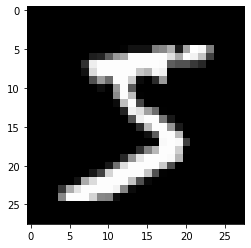

In [41]:
# 测试一个样本数据
plt.imshow(train_features.iloc[0,:].values.reshape((28, 28)), cmap='gray')
train_labels[0]

In [42]:
# 数据标准化处理
train_features = train_features.values / 255.0
test_feature = test_feature.values / 255.0
# train_labels = pd.get_dummies(train_labels)

In [43]:
# 构造网络模型
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [44]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [45]:
with tf.device('/GPU'):
    model.fit(train_features, train_labels, batch_size=64, epochs=10, validation_split=0.25)

Epoch 1/10
528/528 [==============================] - 3s 6ms/step - loss: 0.5200 - sparse_categorical_accuracy: 0.8539 - val_loss: 0.2486 - val_sparse_categorical_accuracy: 0.9282

In [83]:
y_predict = model.predict(test_feature)
y_predict.shape

469/469 [==============================] - 1s 2ms/step


(15000, 10)

In [84]:
import numpy as np
y_predict = np.argmax(y_predict, axis=1)
y_predict[0]

7

In [85]:
test_labels.shape, y_predict.shape

((15000,), (15000,))

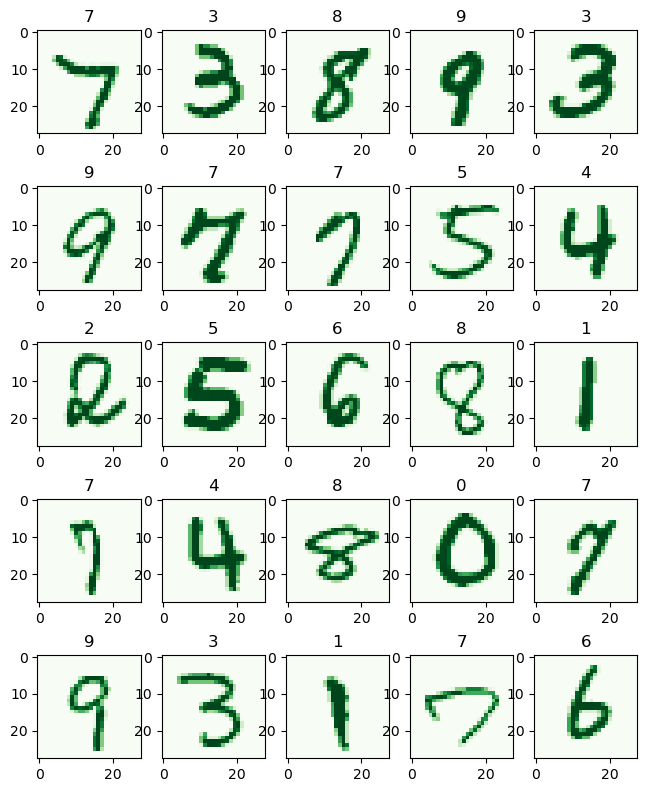

In [91]:
# 截取前25个样本做可视化展示
nrows = 5
ncols = 5
num_cels = nrows * ncols
plt.figure(figsize=(10, 10), dpi=100)
for i in range(num_cels):
    plt.subplot(5, 5, i+1)
    features = test_feature[i]
    features = features * 255
    y_true = test_labels[i]
    predict = y_predict[i]
    if y_true == predict:
        plt.imshow(features.reshape((28, 28)), cmap=plt.cm.Greens)
    else:
        plt.imshow(features.reshape((28, 28)), cmap=plt.cm.Reds)
    plt.title(y_true)
plt.subplots_adjust(left=0.3)
plt.show()